In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

C:\Users\prasant singh\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("Amazon Sale Report.csv")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [35]:
df.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                     0
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [36]:
# Inspect the dataset for missing values
print("Initial missing values:")
print(df[['Amount', 'currency']].isnull().sum())

# Define the imputers
# For the 'Amount' column, we'll use the mean to fill missing values
amount_imputer = SimpleImputer(strategy='mean')


# Apply the imputers 
df['Amount'] = amount_imputer.fit_transform(df[['Amount']])
df.dropna()

# Verify that the missing values have been filled
print("Missing values after imputation:")
print(df[['Amount', 'currency']].isnull().sum())



Initial missing values:
Amount         0
currency    7800
dtype: int64
Missing values after imputation:
Amount         0
currency    7800
dtype: int64


In [37]:
df.currency.unique()

array(['INR', nan], dtype=object)

# 1. Sales Overview:

In [38]:
df["date"]=pd.to_datetime(df["Date"])
sales_overview=df.groupby(df["date"].dt.month).agg({"Amount":"sum","Order ID":"count"}).reset_index()
sales_overview.columns = ['Date', 'Total Sales', 'Number of Orders']

C:\Users\prasant singh\AppData\Local\Temp\ipykernel_9584\161754126.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]=pd.to_datetime(df["Date"])


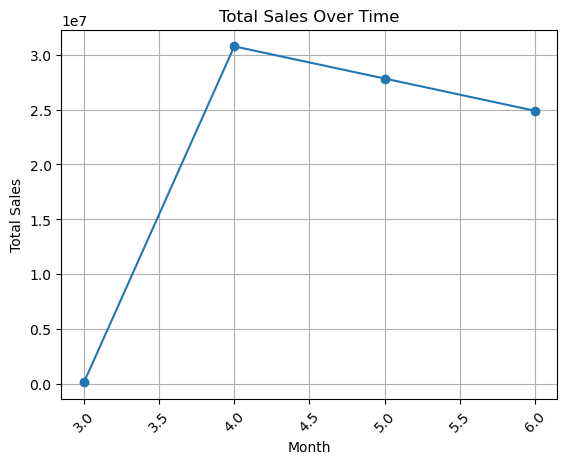

In [39]:
plt.plot(sales_overview['Date'],sales_overview["Total Sales"], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Product Analysis

In [40]:
product_analysis=df.groupby(df["Category"]).agg({"Qty":"sum"}).reset_index()
product_analysis.columns = ['Category', 'Quantity']
product_analysis = product_analysis.sort_values(by='Quantity', ascending=False)

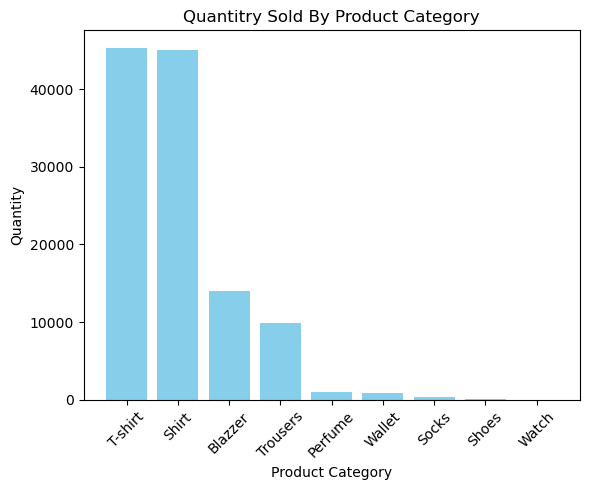

In [41]:
plt.bar(product_analysis['Category'],product_analysis["Quantity"], color='skyblue')
plt.title('Quantitry Sold By Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

# FULFILLMENT ANALYSIS

In [42]:
fulfillment_analysis=df.groupby(df["Fulfilment"]).agg({"Qty":"sum","Order ID":"count"}).reset_index()
fulfillment_analysis.columns = ['Fulfilled', 'Quantity',"Order ID"]


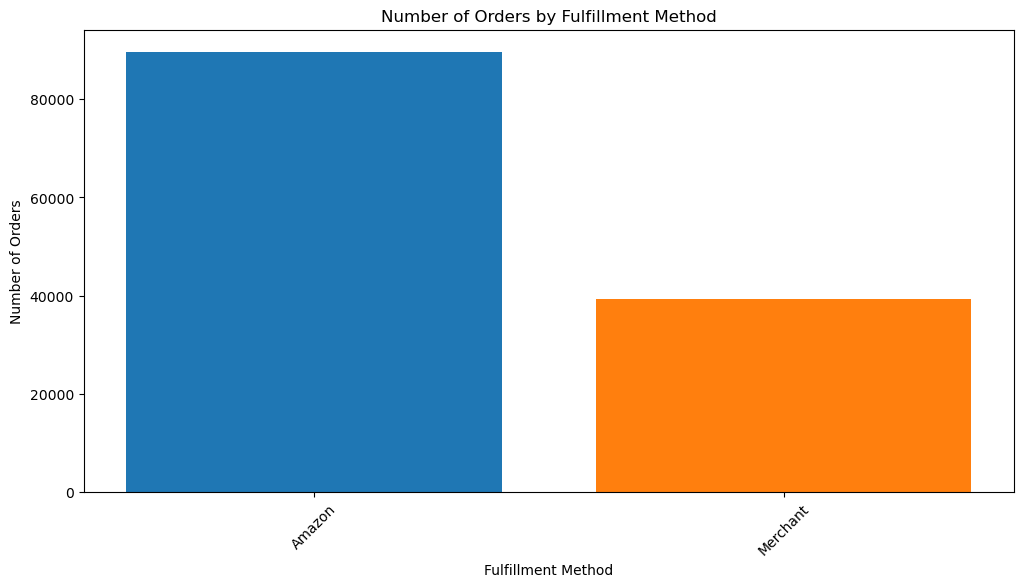

In [43]:
plt.figure(figsize=(12, 6))
colors = plt.get_cmap('tab10').colors
plt.bar(fulfillment_analysis['Fulfilled'], fulfillment_analysis['Order ID'], color=colors)
plt.title('Number of Orders by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


# CUSTOMER SEGMENTATION

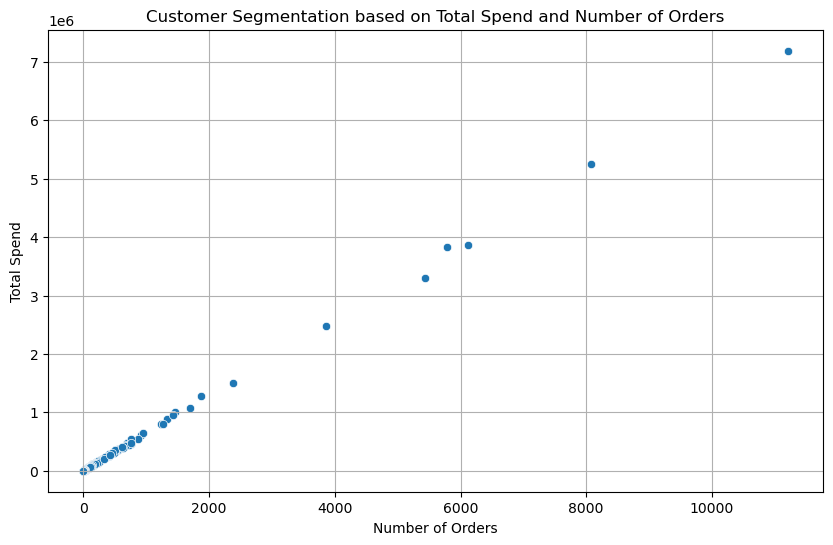

In [49]:
customer_segmentation = df.groupby('ship-city').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
customer_segmentation.columns = ['Shipping Address', 'Total Spend', 'Number of Orders']


# Display customer segmentation
customer_segmentation.head()

# Further segmentation based on total spend and number of orders
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_segmentation, x='Number of Orders', y='Total Spend')
plt.title('Customer Segmentation based on Total Spend and Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Total Spend')
plt.grid(True)
plt.show()

# Geographical Analysis

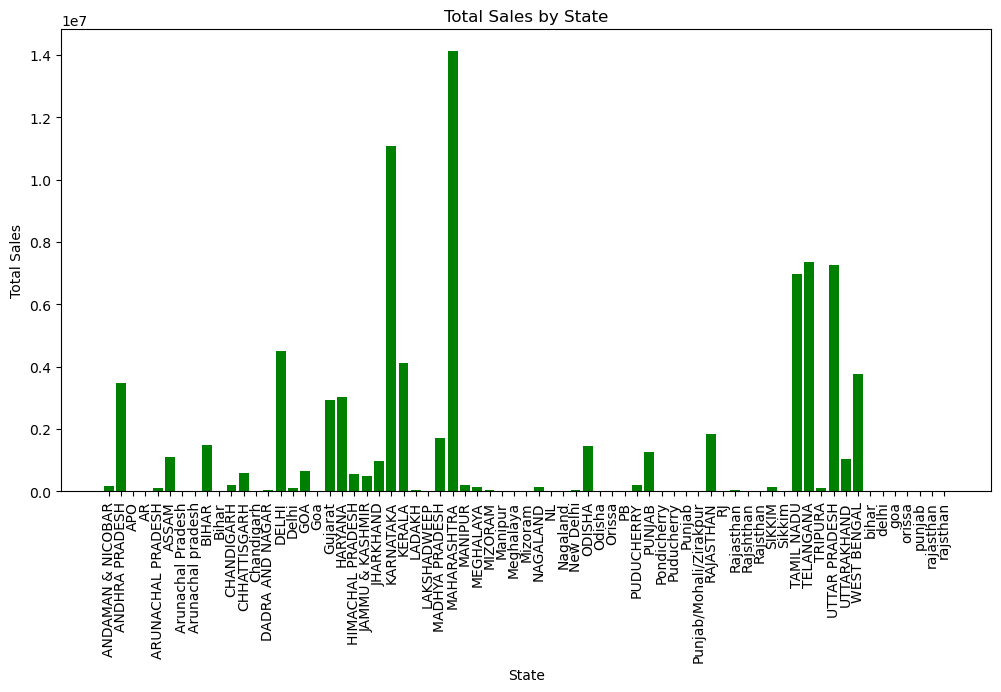

In [52]:
geographical_analysis = df.groupby('ship-state').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()
geographical_analysis.columns = ['ship-state', 'Total Sales', 'Number of Orders']

# Plot the geographical distribution
plt.figure(figsize=(12, 6))
plt.bar(geographical_analysis['ship-state'], geographical_analysis['Total Sales'], color='green')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# BUSINESS INGIHT AND RECOMMENDATION

In [53]:
recommendations = """
1. Focus on high-performing product categories identified in the product analysis.
2. Optimize inventory management based on sales trends and popular products.
3. Enhance fulfillment methods to ensure timely and efficient deliveries.
4. Implement targeted marketing strategies for customer segments with high spending.
5. Expand marketing efforts in states with high sales potential.
"""

print(recommendations)



1. Focus on high-performing product categories identified in the product analysis.
2. Optimize inventory management based on sales trends and popular products.
3. Enhance fulfillment methods to ensure timely and efficient deliveries.
4. Implement targeted marketing strategies for customer segments with high spending.
5. Expand marketing efforts in states with high sales potential.

